<a href="https://colab.research.google.com/github/gsgol/iad_homeworks/blob/main/hw2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.
 
__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.
 
Good luck & have fun! :)

In [1]:
!pip install wandb --quiet
!pip3 install pytorch_lightning torchmetrics --quiet

     |████████████████████████████████| 1.9 MB 36.6 MB/s 
     |████████████████████████████████| 166 kB 63.4 MB/s 
     |████████████████████████████████| 182 kB 62.2 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 166 kB 65.5 MB/s 
     |████████████████████████████████| 162 kB 72.0 MB/s 
     |████████████████████████████████| 162 kB 67.2 MB/s 
     |████████████████████████████████| 158 kB 75.2 MB/s 
     |████████████████████████████████| 157 kB 73.7 MB/s 
     |████████████████████████████████| 157 kB 53.2 MB/s 
     |████████████████████████████████| 157 kB 78.3 MB/s 
     |████████████████████████████████| 157 kB 78.2 MB/s 
     |████████████████████████████████| 157 kB 77.8 MB/s 
     |████████████████████████████████| 157 kB 75.2 MB/s 
     |████████████████████████████████| 157 kB 79.9 MB/s 
     |████████████████████████████████| 156 kB 78.3 MB/s 
     |████████████████████████████████| 795 kB 11.5 MB/s 
     |██████████

In [ ]:
import wandb
wandb.init(group="experiment_1")

In [50]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
from pytorch_lightning.utilities.types import PredictStep
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from tqdm import tqdm
import torchvision.transforms as T
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
import pytorch_lightning as pl
from torchmetrics.functional import accuracy as acc
from sklearn.metrics import accuracy_score
from torchvision.models import resnext50_32x4d
from torchvision.models import resnet50
from torchvision.models import resnet18
from torchvision.models import efficientnet_v2_m
# You may add any imports you need

In [4]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

In [65]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

seed = 1006
seed_everything(seed)

In [6]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

--2022-11-02 11:46:15--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/33l8lp62rmvtx40/dataset.zip [following]
--2022-11-02 11:46:16--  https://www.dropbox.com/s/dl/33l8lp62rmvtx40/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6b2098ae23c3cd08bdcf0d3c20.dl.dropboxusercontent.com/cd/0/get/Bv-JIe7EsAvx-HJJRlRukVkRJntaoooJQBth3_vkptGif-GS39xCSH37HHI1ctYlQWbNYhr5ecOBtge1n3wfRaBaQ56Z0MxXFOGnVo7XpUNnIPd6qh7ohOVsoYvmiGMaHSHgnrokegipPnS6UIuP-oKd9J-5d2eRrhJM98cIxqRPCA/file?dl=1# [following]
--2022-11-02 11:46:16--  https://uc6b2098ae23c3cd08bdcf0d3c20.dl.dropboxusercontent.com/cd/0/get/Bv-JIe7EsAvx-HJJRlRukVkRJntaoooJQBth3_vkptGif-GS39xCSH37HHI1ctYlQWbNYhr5ecOBtg

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True) 

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели. 
5. Можно написать модель руками свою в YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать: 

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали. 
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [76]:
#https://stackoverflow.com/questions/69151052/using-imagefolder-with-albumentations-in-pytorch
# не помню точную ссылку откуда я изначально взял, поэтому прикрепил ссылку в которой описывается данный алгоритм
class Transforms:
    def __init__(self, transform):
        self.transforms = transform

    def __call__(self, img, *args, **kwargs):
        return self.transforms(image=np.array(img))['image']

In [77]:
# YOU CAN DEFINE AUGMENTATIONS HERE
#https://albumentations.ai/docs/examples/pytorch_classification/
train_transform = A.Compose(
    [
        A.SmallestMaxSize(max_size=160),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
        A.RandomCrop(height=128, width=128),
        A.Resize(height=64, width=64),
        A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
        A.RandomBrightnessContrast(p=0.5),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ]
)

val_transform = A.Compose(
    [
        A.SmallestMaxSize(max_size=160),
        A.CenterCrop(height=128, width=128),
        A.Resize(height=64, width=64),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ]
)

train_dataset = ImageFolder('./dataset/dataset/train', transform = Transforms(train_transform))
val_dataset = ImageFolder('./dataset/dataset/val', transform = Transforms(val_transform))
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET

train_dataloader = DataLoader(train_dataset, batch_size = 32, shuffle = True, num_workers = 2, persistent_workers = True ) 
val_dataloader = DataLoader(val_dataset, batch_size = 32, shuffle = False, num_workers = 2, persistent_workers = True) 

In [78]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

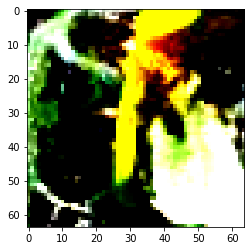

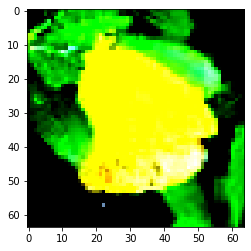

In [79]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

## Задание 1. 

5 баллов
Добейтесь accuracy на валидации не менее 0.44. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

In [ ]:
seed_everything(seed)
class YourNet(torch.nn.Module):
    def __init__(self, pretrained: bool = False) -> None:
        super().__init__()
        self.model = resnet18(pretrained=pretrained, num_classes = 200)
        self.optimizer = torch.optim.Adam(self.model.parameters())
        self.loss = nn.CrossEntropyLoss()

    def forward(self, x) -> torch.Tensor:
        preds = self.model(x)
        return preds

    def configure_optimizers(self):
        return self.optimizer

    def training_step(self, train_batch, batch_idx) -> torch.Tensor:
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx) -> None:
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        acc = accuracy(torch.argmax(preds, dim=-1).long(), target.long())
        self.log("val_loss", loss, prog_bar=True)
        self.log("accuracy", acc, prog_bar=True)
        return loss


### Тренировочный класс lightning

In [ ]:
seed_everything(seed)
class YourModule(pl.LightningModule):
    def __init__(self, model) -> None:
        super().__init__()
        self.model = model
        self.optimizer = torch.optim.Adam(self.model.parameters())
        self.loss = nn.CrossEntropyLoss()


    def forward(self, x) -> torch.Tensor:
        preds = self.model(x)
        return preds

    def configure_optimizers(self):
        return self.optimizer

    def training_step(self, train_batch, batch_idx) -> torch.Tensor:
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx) -> None:
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.acc = accuracy(torch.argmax(preds, dim=-1), target)
        self.log("val_loss", loss, prog_bar=True)
        self.log("accuracy", acc, prog_bar=True)
        return loss

    def get_accuracy(self, reset=True):
        return self.acc


In [ ]:
seed_everything(seed)
wandb_logger = WandbLogger(log_model='all') # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning


model = YourNet(pretrained = False)# YOUR CODE HERE
module = YourModule(model = model) # YOUR CODE HERE

/opt/conda/lib/python3.7/site-packages/pytorch_lightning/loggers/wandb.py:353: UserWarning: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
  "There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse"


In [ ]:
trainer = pl.Trainer(logger = wandb_logger, strategy = "dp", max_epochs = 12, accelerator='gpu', devices = 2)
trainer.fit(module, train_dataloader, val_dataloader)

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

### Валидация результатов задания

In [ ]:
seed_everything(seed)
def evaluate_task(model, test_dataloader):
    model = model
    predicted_classes = torch.Tensor([])
    true_classes = torch.Tensor([])

    model.eval()
    with torch.no_grad():
        for images, labels in tqdm(test_dataloader):
            images, labels = images, labels

            pred = model.forward(images)
            pred_classes = torch.argmax(pred, dim=-1)

            predicted_classes = torch.cat((predicted_classes, pred_classes), 0)
            true_classes = torch.cat((true_classes, labels), 0)

    return accuracy_score(predicted_classes.cpu().detach().numpy(), true_classes.cpu().detach().numpy())

In [ ]:
seed_everything(seed)
model = model


accuracy = evaluate_task(model, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * accuracy / 0.44, 0, 10):.2f} баллов")

100%|██████████| 313/313 [00:46<00:00,  6.68it/s]

Оценка за это задание составит 9.24 баллов


## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.84. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте предобученную)

In [68]:
# YOU CAN DEFINE AUGMENTATIONS HERE
seed_everything(seed)
train_transform = A.Compose(
    [
        A.SmallestMaxSize(max_size=160),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
        A.RandomCrop(height=128, width=128),
        A.Resize(height=224, width=224),
        A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
        A.RandomBrightnessContrast(p=0.5),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ]
)

val_transform = A.Compose(
    [
        A.SmallestMaxSize(max_size=160),
        A.CenterCrop(height=128, width=128),
        A.Resize(height=224, width=224),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ]
)
train_dataset = ImageFolder('./dataset/dataset/train', transform = Transforms(train_transform))
val_dataset = ImageFolder('./dataset/dataset/val', transform = Transforms(val_transform))


train_dataloader = DataLoader(train_dataset, batch_size = 32, shuffle = True) 
val_dataloader = DataLoader(val_dataset, batch_size = 32, shuffle = False) 

In [69]:
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Тренировочный класс lightning

In [70]:
seed_everything(seed)
class YourModule_1(pl.LightningModule):
    def __init__(self, model):
        super().__init__()
        self.model = model
        self.model.classifier[1] = nn.Linear(1280, 200)
        self.loss = nn.CrossEntropyLoss()


    def forward(self, x):
        return self.model(x)

    def configure_optimizers(self):
        self.optimizer_1 = torch.optim.Adam(self.model.classifier[1].parameters(), lr=0.0003)
        self.scheduler_1 = torch.optim.lr_scheduler.ReduceLROnPlateau(self.optimizer_1, verbose=True, factor=0.4, patience=1, mode='max')
        self.optimizer_2 = torch.optim.Adam(self.model.features.parameters(), lr=0.00007)
        self.scheduler_2 = torch.optim.lr_scheduler.ReduceLROnPlateau(self.optimizer_2, verbose=True, factor=0.4, patience=1, mode='max')
        return ([self.optimizer_1, self.optimizer_2,],[{"scheduler": self.scheduler_1, "monitor": "val_accuracy", "interval": "step", "frequency": 600},
         {"scheduler": self.scheduler_2, "monitor": "val_accuracy", "interval": "step", "frequency": 600},])

    def training_step(self, train_batch, batch_idx, optimizer_idx):
        images, target = train_batch
        preds = self.model(images)
        loss = self.loss(preds, target)
        self.acc_train = acc(torch.argmax(preds, dim=-1), target)
        self.log("train_loss", loss, prog_bar=True)
        self.log("train_accuracy", self.acc_train, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        preds = self.model(images)
        loss = self.loss(preds, target)
        self.acc_val = acc(torch.argmax(preds, dim=-1), target)
        self.log("val_loss", loss, prog_bar=True)
        self.log("val_accuracy", self.acc_val, prog_bar=True, on_epoch=True)
        return loss

    def get_accuracy(self, reset=True):
        return self.acc_val

In [71]:
seed_everything(seed)
wandb.finish()                                                                  
wandb_logger = WandbLogger(log_model='all', project='uncategorized_3')        # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning

epoch,▁
train_accuracy,▁
train_loss,▁
trainer/global_step,▁
epoch,0
train_accuracy,0.125
train_loss,5.08921
trainer/global_step,49


In [72]:
seed_everything(seed)
module = YourModule_1(efficientnet_v2_m(weights=torchvision.models.EfficientNet_V2_M_Weights.DEFAULT))

In [73]:
seed_everything(seed)
trainer = pl.Trainer(logger = wandb_logger, max_epochs=2, auto_lr_find=False, accelerator='gpu', val_check_interval=200)
trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | EfficientNet     | 53.1 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
53.1 M    Trainable params
0         Non-trainable params
53.1 M    Total params
212.458   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch 00010: reducing learning rate of group 0 to 1.2000e-04.
Epoch 00010: reducing learning rate of group 0 to 2.8000e-05.


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=2` reached.


### Валидация результатов задания

In [74]:
def evaluate_task(model, test_dataloader):
    model = model
    predicted_classes = torch.Tensor([])
    true_classes = torch.Tensor([])

    model.eval()
    with torch.no_grad():
        for images, labels in tqdm(test_dataloader):
            images, labels = images, labels

            pred = model.forward(images)
            pred_classes = torch.argmax(pred, dim=-1)

            predicted_classes = torch.cat((predicted_classes, pred_classes), 0)
            true_classes = torch.cat((true_classes, labels), 0)

    return accuracy_score(predicted_classes.cpu().detach().numpy(), true_classes.cpu().detach().numpy())

In [75]:
model = module

accuracy = evaluate_task(model, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * (accuracy - 0.5) / 0.34, 0, 10):.2f} баллов")

100%|██████████| 313/313 [49:23<00:00,  9.47s/it]

Оценка за это задание составит 9.51 баллов


# Отчёт об экспериментах 

текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.

https://wandb.ai/iad_4/uncategorized_3/runs/9oo4ebsy?workspace=user-gsgol - модель для второго задания
https://wandb.ai/iad_4/uncategorized/runs/32yd32d7?workspace=user-gsgol - модель для первого задания
https://wandb.ai/iad_4/uncategorized/groups/experiment_1/workspace?workspace=user-gsgol - обучение и выбор для обеих моделей очень много запусков

# Общая часть

### Для обеих моделей оформление YourNet и YourModule копировал из 5-го семинара, для второй модели YourNet удалил поскольку не думаю, что есть смысл ведь импортирую предобученную, возможно в первом заданиии поскольку я импортировал непредобученную тоже смысла в YourNet нет.

# Первая модель

### В первом задании, почти сразу получилось выбить нужный скор с resnet18, но потом я понял, что неправильно использовал аугментацию и подавал на вход картинки с ресайзом в 128 после чего переобучал модель, но по сути всё время экспериментировал с resnet18 по итогу её и оставил использовал в оптимайзере Adam поскольку в прошлой домашке он оказался наилучшим и в целом исходя из лекций он лучше всего подходит для наших задач, также говорили про SGD momentum, но в прошлом дз SGD показывал очень плохие результаты, также на семинаре использовали кросс-энтропию решил её оставить поскольку не придумал, какой другой loss брать, обучал на kaggle с ускорителем GPU T4 X2, поэтому devices = 2 и num_workers = 2 в dataloader'е

# Вторая модель

### Во втором задании я попробовал vgg, resnet, resnext, efficientnet, начал с resnet50 и vgg16, но обе показали результаты не больше 0,64  vgg19 была очень массивной и не хватало памяти, для адекватного batch_size поэтому одна эпоха шла 2,5 часа решил не дообучивать, resnext50 тоже показала маленькое accuracy, всего 0,61 после чего решил попробовать посмотреть модели для ImageNet нашел EfficientNet сначала пробовал b3 но там было 0,47 на первой эпохе и после этого не сильно росло accuracy, потом поробовал b7 также результаты были плачевные 0,66 максимальное accuracy, потом в документации нашел информацию про efficientnet_v2 на Kaggle почему-то не получалось импортировать данную модель поэтому использовал collab на efficientnet_v2_l не хватило памяти поэтому использовал efficientnet_v2_m, но произошло что-то странное и на первой эпохе было значение accuracy 0.006 я не понял почему так и решил добавить train_accuracy в лог а также валидировать очень часто в процессе обучения, но ничего не поменялось, поэтому решил добавить несколько оптимизаторов, опять 0 эффекта, оба оптимизатора были Adam опять же поскольку он сочетает в себе плюсы momentuma и адаптивности, но это опять не принесло плюсов, тогда решил добавить scheduler поскольку у меня прекращала расти accuracy я решил добавить ReduceLROnPlateau поскольку он именно помогает отследить ситуацию, когда какой-то показатель модели не меняется чтобы видеть применяется он или нет я поставил verbose = True а также выставил patient = 1 поскольку в целом обучал модель малое число эпох, и одна эпоха без изменения это уже повод применить scheduler, опять что-то было не то и скор не рос я уже думал сдаться ведь сроки поджимали, а модель всё не училась, но кто-то в чатике писал, что у него хорошо сработал efficientnet и я решил продолжить, и вдруг мне неожиданно помогла строчка  wandb.finish(), её нашел где-то в документации, возможно правда я что-то упускаю, и помогла не она, но я не совсем понимаю, что конкретно помогло и вот уже после первой валидации в процессе обучения accuracy была 0,75, что существенно выше результатов, которые показывали другие модели, в итоге дообучил модель и удалось выбить 0,817. Также использовал кросс-энтропию, поскольку не придумал другой loss. Обучал в collab в нем 1 gpu поэтому убрал devices = 2 и num_workers.
